## Importing libraries

In [1]:
import pandas as pd

df = pd.read_csv("global_air_pollution_data.csv")
df.head()


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


## Data preprocessing

In [2]:
df.isnull().sum()

,0
country_name,427
city_name,1
aqi_value,0
aqi_category,0
co_aqi_value\t,0
co_aqi_category,0
ozone_aqi_value,0
ozone_aqi_category,0
no2_aqi_value,0
no2_aqi_category,0


In [3]:
# Drop rows where either country_name or city_name is missing
df = df.dropna(subset=["country_name", "city_name"])

# Reset the index after dropping rows (optional, but recommended)
df = df.reset_index(drop=True)

print("Rows after dropping missing values:", df.shape)


Rows after dropping missing values: (23035, 12)


In [4]:
df.isnull().sum() # verifying the data after removing all the empty values

,0
country_name,0
city_name,0
aqi_value,0
aqi_category,0
co_aqi_value\t,0
co_aqi_category,0
ozone_aqi_value,0
ozone_aqi_category,0
no2_aqi_value,0
no2_aqi_category,0


In [5]:
df.columns


Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [6]:
# remove any unwanted things in the column names(such as \t)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\t','', regex=True)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [7]:
df.columns.tolist()


['country_name',
 'city_name',
 'aqi_value',
 'aqi_category',
 'co_aqi_value',
 'co_aqi_category',
 'ozone_aqi_value',
 'ozone_aqi_category',
 'no2_aqi_value',
 'no2_aqi_category',
 'pm2.5_aqi_value',
 'pm2.5_aqi_category']

In [8]:
'''label encoding the country_name and city_name as this two are text based,
the model can fit efficiently for the numbers, so for training also we need
to convert the text to numbers , so use label encoding concept'''
from sklearn.preprocessing import LabelEncoder

le_country = LabelEncoder()
le_city = LabelEncoder()

df["country_encoded"] = le_country.fit_transform(df["country_name"])
df["city_encoded"] = le_city.fit_transform(df["city_name"])


In [9]:
features = [
    "co_aqi_value",
    "ozone_aqi_value",
    "no2_aqi_value",
    "pm2.5_aqi_value",
    "country_encoded",
    "city_encoded"
]

X = df[features]
y = df["aqi_value"]

## Model selection

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.2812437594964184
R2 Score: 0.9966731702283292


In [11]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.9997807387973486
0.9966731702283292


In [12]:
df_results = pd.DataFrame({
    'Actual_AQI': y_test.values,
    'Predicted_AQI': y_pred
})

df_results.head(20)


,Actual_AQI,Predicted_AQI
0,139,139.000000
1,154,154.000000
2,37,36.993333
3,99,99.000000
4,97,97.000000
5,137,137.000000
6,60,60.000000
7,54,54.000000
8,62,62.000000
9,62,62.000000


In [13]:
df_results['Error'] = abs(df_results['Actual_AQI'] - df_results['Predicted_AQI'])
df_results.head()


,Actual_AQI,Predicted_AQI,Error
0,139,139.000000,0.000000
1,154,154.000000,0.000000
2,37,36.993333,0.006667
3,99,99.000000,0.000000
4,97,97.000000,0.000000


In [14]:
df_results['Error'].mean()


np.float64(0.2812437594964184)

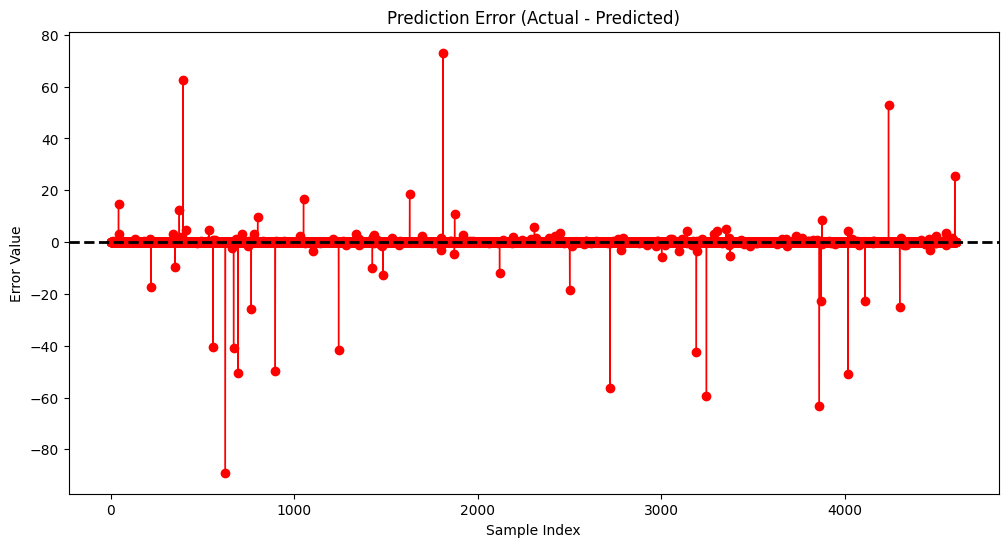

In [15]:
import matplotlib.pyplot as plt

error = y_test.values - y_pred

plt.figure(figsize=(12,6))
plt.plot(error, color='red', marker='o', linestyle='-', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title("Prediction Error (Actual - Predicted)")
plt.ylabel("Error Value")
plt.xlabel("Sample Index")
plt.show()


In [16]:
df.shape


(23035, 14)

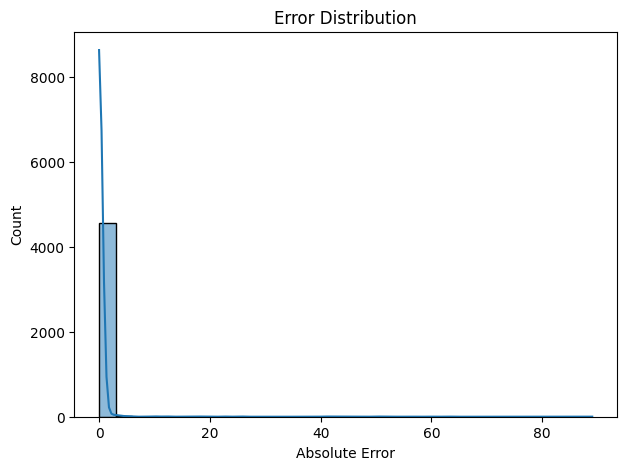

In [17]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.histplot(df_results['Error'], bins=30, kde=True)
plt.title("Error Distribution")
plt.xlabel("Absolute Error")
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²   :", r2_score(y_test, y_pred))


MAE : 0.2812437594964184
RMSE: 3.329591889458964
R²   : 0.9966731702283292


In [19]:
def classify_aqi(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Satisfactory"
    elif aqi <= 200: return "Moderate"
    elif aqi <= 300: return "Poor"
    elif aqi <= 400: return "Very Poor"
    else: return "Severe"

df_results['Actual_Category'] = df_results['Actual_AQI'].apply(classify_aqi)
df_results['Predicted_Category'] = df_results['Predicted_AQI'].apply(classify_aqi)

(df_results['Actual_Category'] == df_results['Predicted_Category']).mean()


np.float64(0.9973952680703277)

## Storing the model knowledge in the PKL file

In [20]:
import pickle


In [21]:
# Save your trained model as a Pickle (.pkl) file
with open("aqi_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as aqi_model.pkl")


Model saved successfully as aqi_model.pkl


In [22]:
import os
os.listdir()


['.config', 'global_air_pollution_data.csv', 'aqi_model.pkl', 'sample_data']

In [23]:
import pickle

with open("aqi_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [24]:
print(X.dtypes)


co_aqi_value       int64
ozone_aqi_value    int64
no2_aqi_value      int64
pm2.5_aqi_value    int64
country_encoded    int64
city_encoded       int64
dtype: object
